# PUT/CALL/STOCK CORRELATION 

In [86]:
import yfinance as yf
import pandas as pd

# CALLoption OTM symbol SPX  strike=4550
option_symbol = "SPXW230908C04550000"  # Adatta questo simbolo all'opzione di tuo interesse
option_data = yf.Ticker(option_symbol)
O_data = option_data.history(start="2023-09-06", end="2023-09-07", interval="1m")["Close"]
O_data = O_data[35:152]
O_data

Datetime
2023-09-06 10:00:00-04:00    0.81
2023-09-06 10:02:00-04:00    0.67
2023-09-06 10:03:00-04:00    0.70
2023-09-06 10:04:00-04:00    0.70
2023-09-06 10:05:00-04:00    0.59
                             ... 
2023-09-06 15:59:00-04:00    0.25
2023-09-06 16:00:00-04:00    0.20
2023-09-06 16:02:00-04:00    0.15
2023-09-06 16:03:00-04:00    0.15
2023-09-06 16:05:00-04:00    0.15
Name: Close, Length: 116, dtype: float64

In [87]:
data = yf.download("^SPX", start="2023-09-06", end="2023-09-07", interval="1m")["Close"]
data

[*********************100%***********************]  1 of 1 completed


Datetime
2023-09-06 09:30:00-04:00    4483.390137
2023-09-06 09:31:00-04:00    4482.450195
2023-09-06 09:32:00-04:00    4481.470215
2023-09-06 09:33:00-04:00    4480.399902
2023-09-06 09:34:00-04:00    4480.839844
                                ...     
2023-09-06 15:55:00-04:00    4464.229980
2023-09-06 15:56:00-04:00    4464.270020
2023-09-06 15:57:00-04:00    4465.029785
2023-09-06 15:58:00-04:00    4465.740234
2023-09-06 15:59:00-04:00    4465.459961
Name: Close, Length: 390, dtype: float64

In [88]:
df1 = pd.DataFrame({"Prezzo dell'opzione": O_data, "Prezzo dell'azione": data})
df1.corr()

,Prezzo dell'opzione,Prezzo dell'azione
Prezzo dell'opzione,1.000000,0.848093
Prezzo dell'azione,0.848093,1.000000


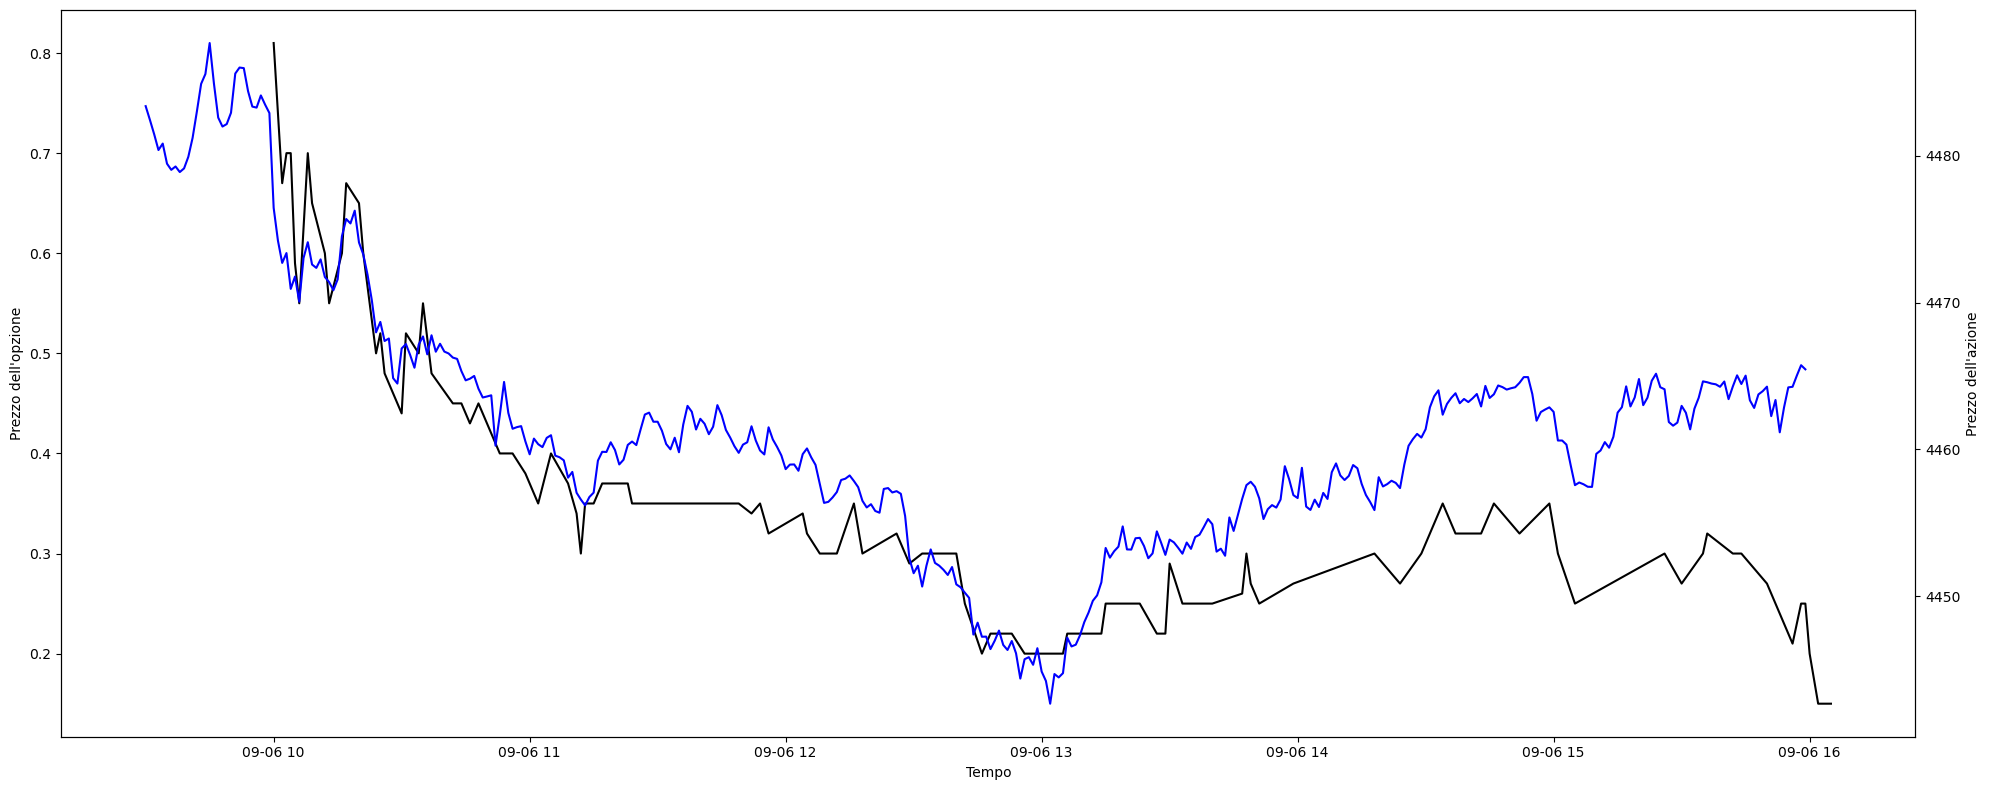

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(20, 8), dpi=100)

ax1.set_xlabel("Tempo")
ax1.set_ylabel("Prezzo dell'opzione", color="black")
ax1.plot(O_data, color="black",label="Opzione")
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("Prezzo dell'azione", color="black")  # we already handled the x-label with ax1
ax2.plot(data, color="blue", label="Azione")
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()# otherwise, the right y-label is slightly clipped
plt.show()


In [80]:
#PUToption ATM symbol SPX expirationdate=2023-08-04 strike=4505
option_symbol = "SPXW230908P04550000"  # Adatta questo simbolo all'opzione di tuo interesse
option_data = yf.Ticker(option_symbol)
O_data = option_data.history(start="2023-09-06", end="2023-09-07", interval="1m")["Close"]
O_data

data = yf.download("^SPX", start="2023-09-06", end="2023-09-07", interval="1m")["Close"]

df2 = pd.DataFrame({"Prezzo dell'opzione": O_data, "Prezzo dell'azione": data})
df2.corr()

[*********************100%***********************]  1 of 1 completed


,Prezzo dell'opzione,Prezzo dell'azione
Prezzo dell'opzione,1.000000,-0.993579
Prezzo dell'azione,-0.993579,1.000000


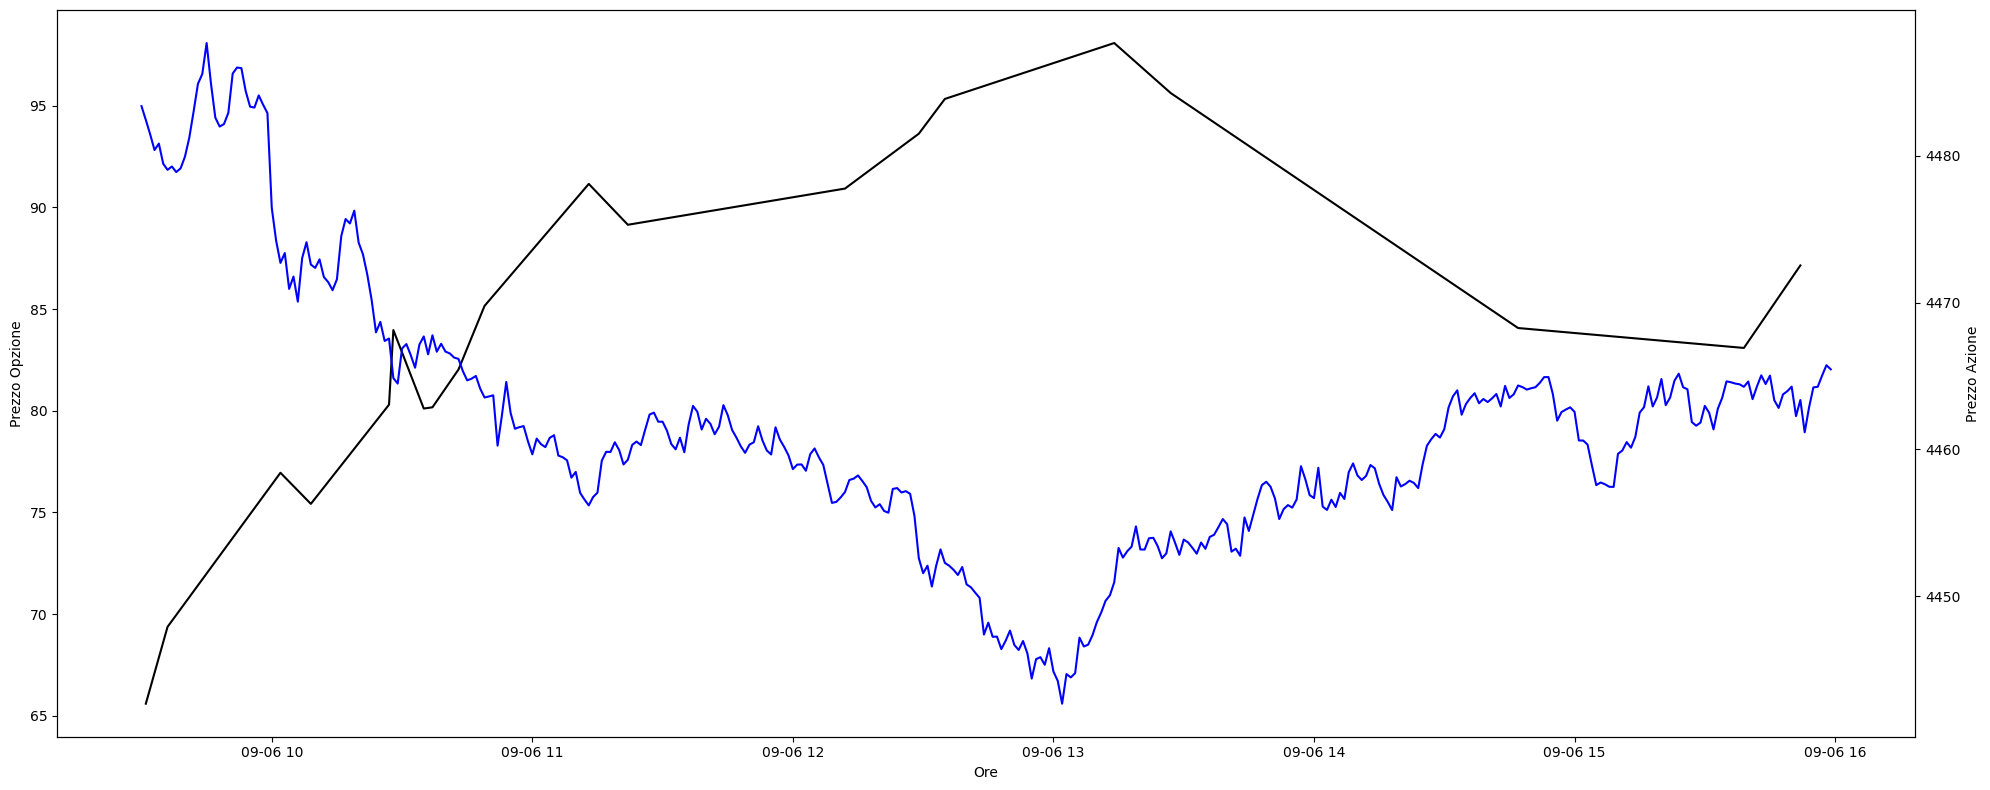

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(20, 8), dpi=100)

ax1.set_xlabel('Ore')
ax1.set_ylabel('Prezzo Opzione', color="black")
ax1.plot(O_data, color="black")
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Prezzo Azione', color="black")  # we already handled the x-label with ax1
ax2.plot(data, color="blue")
ax2.tick_params(axis='y', labelcolor="black")

fig.tight_layout()  # otherwise, the right y-label is slightly clipped
plt.show()

In [79]:
# CSV
savedf1 = df1.to_csv("CallSPX1mprice.csv")
savedf2 = df2.to_csv("PutSPX1mprice.csv")